## Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [3]:
import pandas as pd

url = "../data/benin-malanville.csv"

# If it's a CSV:
df = pd.read_csv(url)
print(df.shape)
df.head()


(525600, 19)


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

# 1. Summary Statistics & Missing-Value Report

In [4]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
71832   2021-09-27 21:13   -1.8   -0.3   -1.7    0.0    0.0  28.0  85.7  1.9   
497455  2022-07-20 10:56  589.5  136.7  462.1  525.0  524.3  28.6  74.2  3.3   
496036  2022-07-19 11:17  874.0  517.6  389.6  802.0  797.3  28.7  70.0  4.7   
287543  2022-02-24 16:24  564.0  674.9  163.5  559.4  487.9  38.2   4.7  1.6   
499324  2022-07-21 18:05  211.0  492.1   79.0  105.4  106.4  31.5  60.7  2.4   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
71832      2.1      0.3  183.6      4.7  994         0            0.0   27.5   
497455     4.1      0.5  269.9     10.9  996         0            0.0   57.6   
496036     6.9      1.4  259.2     11.8  996         0            0.0   44.7   
287543     2.4      0.5   96.3     12.7  992         0            0.0   48.3   
499324     2.6      0.3  264.3      5.9  993         0            0.0   35.3   

        TModB  Comments  
71832    26.9       NaN  
497455   48.4       NaN  
496036   40.4       NaN  
287543   44.8       NaN  
499324   35.0       NaN

In [5]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [6]:
# Calculate percentage of missing values per column
null_percent = (df.isna().sum() / len(df)) * 100

# Filter columns with >5% missing values
cols_over_5 = null_percent[null_percent > 5]

# Display the result
print("Columns with more than 5% missing values:")
#print(cols_over_5)
# Calculate percent of missing values
null_percent = (df.isna().sum() / len(df)) * 100

# List columns with >5% nulls
cols_over_5 = null_percent[null_percent > 5].index.tolist()

print("Columns with >5% nulls:", cols_over_5)


Columns with more than 5% missing values:
Columns with >5% nulls: ['Comments']


# 2. Outlier Detection & Basic Cleaning

## Check missing values

In [8]:
# Columns to check for missing values
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

print("Missing values in key columns:")
df[cols_to_check].isna().sum()


Missing values in key columns:


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

## Check Incorrect / Impossible Values

In [9]:
print("Incorrect or impossible entries (negative values):")

for col in cols_to_check:
    invalid_rows = df[df[col] < 0]
    count_invalid = len(invalid_rows)
    print(f"{col}: {count_invalid} incorrect values found")


Incorrect or impossible entries (negative values):
GHI: 258847 incorrect values found
DNI: 275987 incorrect values found
DHI: 259182 incorrect values found
ModA: 0 incorrect values found
ModB: 0 incorrect values found
WS: 0 incorrect values found
WSgust: 0 incorrect values found



## Outlier Detection Using IQR Method

In [10]:

print("\nOutlier Detection ")

for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outlier rows")



Outlier Detection 
GHI: 145 outlier rows
DNI: 15196 outlier rows
DHI: 8733 outlier rows
ModA: 98 outlier rows
ModB: 240 outlier rows
WS: 6717 outlier rows
WSgust: 5368 outlier rows


## Z-scores and flag rows with |Z| > 3

In [11]:
from scipy.stats import zscore
z_scores = df[cols_to_check].apply(zscore)

# Flag rows where any column has |Z| > 3
outliers_mask = (np.abs(z_scores) > 3).any(axis=1)
outlier_rows = df[outliers_mask]

print("Number of rows with |Z| > 3:", outliers_mask.sum())
print(outlier_rows)

Number of rows with |Z| > 3: 7740
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525141  2022-08-08 16:22     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525142  2022-08-08 16:23     4.6    0.2    4.6     5.9     5.8  21.9  99.0   
525143  2022-08-08 16:24     4.5   -0.1    4.5     5.8     5.7  21.9  99.0   
525151  2022-08-08 16:32     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   
525155  2022-08-08 16:36     4.8    0.0    4.9     6.0     5.9  22.0  99.1   

         WS  WSgust  WSstdev 

## Handle Missing Values in Key Columns

In [26]:
df_dropped = df.dropna(subset=cols_to_check)
print("Shape after dropping rows with missing values:", df_dropped.shape)

# Option 2: Impute missing values with median
df_imputed = df.copy()
for col in cols_to_check:
    median_value = df_imputed[col].median()
    df_imputed[col].fillna(median_value,inplace=True)

print("Missing values after median imputation:\n", df_imputed[cols_to_check].isna().sum())

Shape after dropping rows with missing values: (525600, 20)
Missing values after median imputation:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


C:\Users\eyoba\AppData\Local\Temp\ipykernel_15156\2170274189.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(median_value,inplace=True)
C:\Users\eyoba\AppData\Local\Temp\ipykernel_15156\2170274189.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

## saving clean data

In [13]:
import os

df_clean = df_imputed[~outliers_mask]  # keep only rows where all |Z| <= 3
print("After removing Z-score outliers:", df_clean.shape)
os.makedirs("data", exist_ok=True)
output_file = "../data/benin_clean.csv"
df_clean.to_csv(output_file, index=False)
print("Cleaned dataset saved to:", output_file)

After removing Z-score outliers: (517860, 19)
Cleaned dataset saved to: ../data/benin_clean.csv


## Time Series Analysis

## Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp

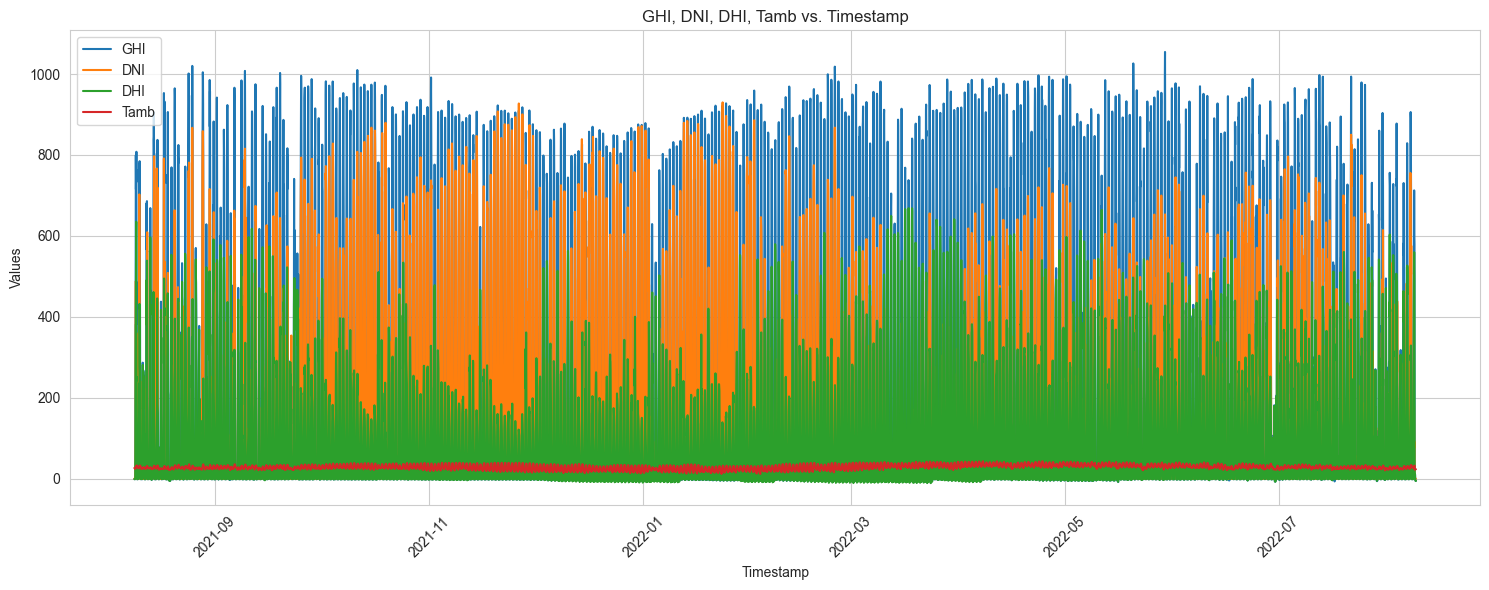

In [15]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Optional: resample hourly to reduce overplotting
df_hourly = df.set_index('Timestamp').resample('h').mean()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('GHI, DNI, DHI, Tamb vs. Timestamp')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observe patterns by month, trends throughout the day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 


1. Monthly Patterns

GHI, DNI, and DHI exhibit seasonal variations.

Higher values are observed during dry and sunny months, indicating strong solar irradiance.

Lower readings appear in cloudy or rainy months, when atmospheric conditions reduce direct sunlight.

Temperature (Tamb) follows a gradual seasonal trend, with slightly higher averages during hotter months and lower values during cooler periods.

2. Daily Trends

All irradiance variables (GHI, DNI, DHI) follow a clear diurnal cycle — they rise sharply in the morning, peak around noon, and drop back to near zero at night.

Tamb shows a smoother daily curve, with temperature peaking slightly after midday, following the sun’s heating pattern.

3. Anomalies and Fluctuations

Sudden spikes or drops in GHI, DNI, or DHI indicate possible cloud cover, sensor noise, or transient weather events.

Occasional flat or missing segments may point to data collection interruptions or sensor faults.

Temperature fluctuations are comparatively small but align with irradiance changes, confirming a correlation between solar intensity and ambient temperature.

## Cleaning Impact

## Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

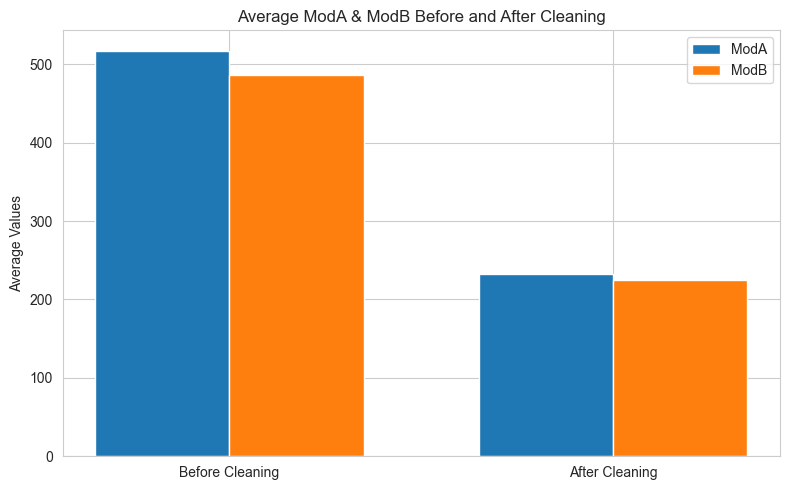

   Cleaning_Flag        ModA        ModB  Cleaning_Status
0              0  517.343618  486.943256  Before Cleaning
1              1  232.393310  225.026584   After Cleaning


In [16]:
## Cleaning Impact
## Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

# Create a 'Cleaning_Flag' column
# (1 = kept after cleaning, 0 = removed as outlier)
df['Cleaning_Flag'] = np.where(outliers_mask, 0, 1)

# Group by Cleaning flag
mod_stats = df.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

# Rename for readability
mod_stats['Cleaning_Status'] = mod_stats['Cleaning_Flag'].map({1: 'After Cleaning', 0: 'Before Cleaning'})

# Plot
plt.figure(figsize=(8,5))
bar_width = 0.35
x = np.arange(len(mod_stats['Cleaning_Status']))

plt.bar(x - bar_width/2, mod_stats['ModA'], width=bar_width, label='ModA')
plt.bar(x + bar_width/2, mod_stats['ModB'], width=bar_width, label='ModB')

plt.xticks(x, mod_stats['Cleaning_Status'])
plt.ylabel('Average Values')
plt.title('Average ModA & ModB Before and After Cleaning')
plt.legend()
plt.tight_layout()
plt.show()

print(mod_stats)


## Correlation & Relationship Analysis

## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

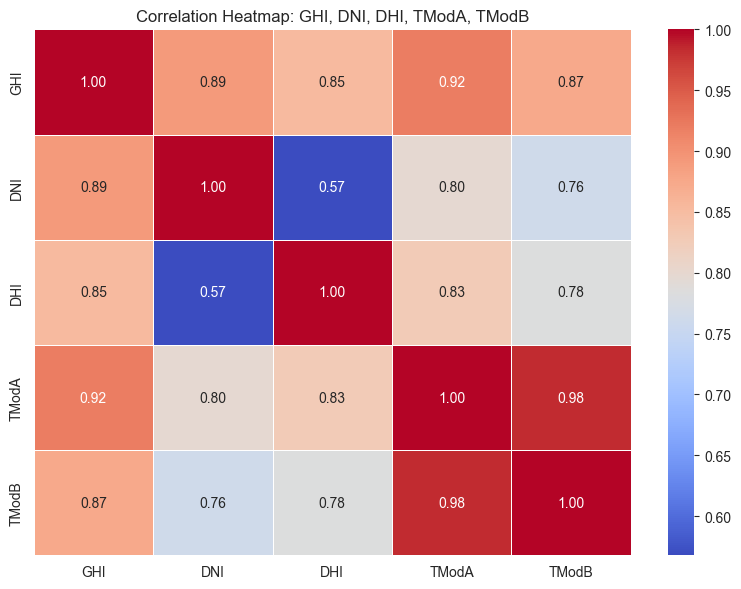

In [20]:
## Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)




# Select relevant columns
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
# Compute correlation matrix

corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()


## Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

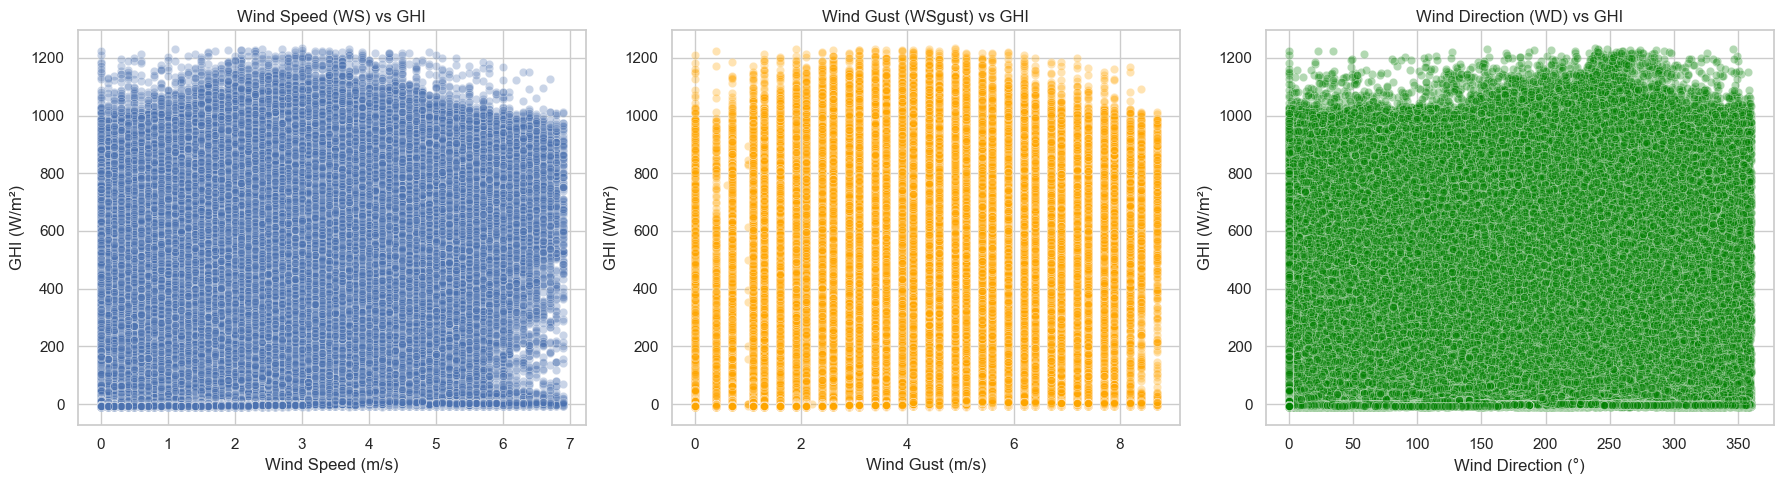

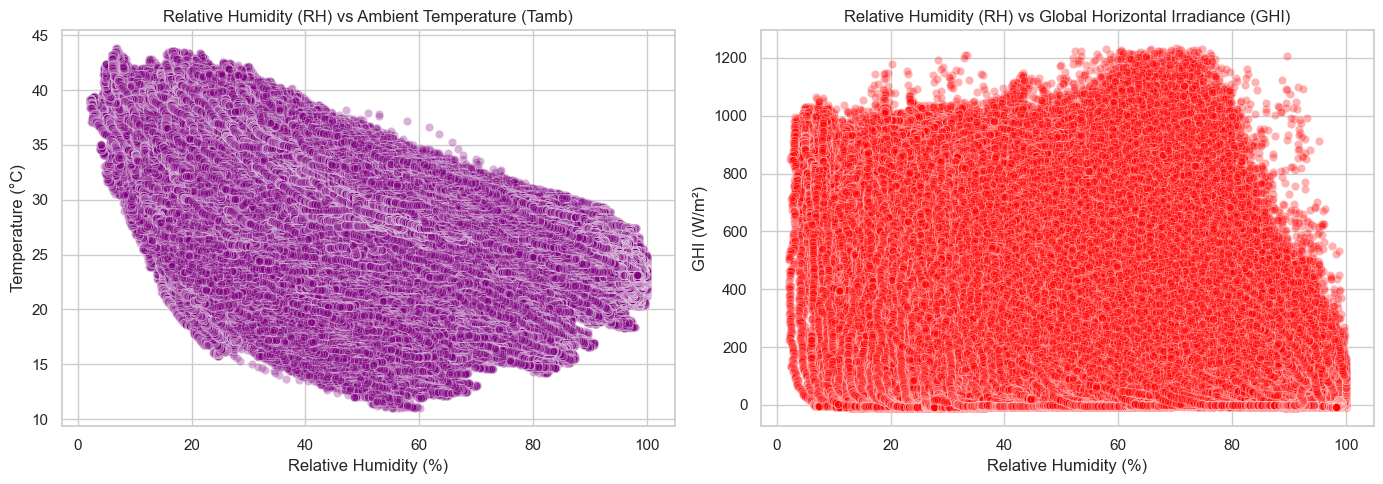

In [21]:
## Scatter Plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI

# Set the visual style
sns.set(style="whitegrid", context="notebook")

# 1. WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.3, ax=axes[0])
axes[0].set_title("Wind Speed (WS) vs GHI")
axes[0].set_xlabel("Wind Speed (m/s)")
axes[0].set_ylabel("GHI (W/m²)")

sns.scatterplot(data=df_clean, x="WSgust", y="GHI", alpha=0.3, ax=axes[1], color="orange")
axes[1].set_title("Wind Gust (WSgust) vs GHI")
axes[1].set_xlabel("Wind Gust (m/s)")
axes[1].set_ylabel("GHI (W/m²)")

sns.scatterplot(data=df_clean, x="WD", y="GHI", alpha=0.3, ax=axes[2], color="green")
axes[2].set_title("Wind Direction (WD) vs GHI")
axes[2].set_xlabel("Wind Direction (°)")
axes[2].set_ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()

# 2. RH vs Tamb and RH vs GHI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=0.3, ax=axes[0], color="purple")
axes[0].set_title("Relative Humidity (RH) vs Ambient Temperature (Tamb)")
axes[0].set_xlabel("Relative Humidity (%)")
axes[0].set_ylabel("Temperature (°C)")

sns.scatterplot(data=df_clean, x="RH", y="GHI", alpha=0.3, ax=axes[1], color="red")
axes[1].set_title("Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)")
axes[1].set_xlabel("Relative Humidity (%)")
axes[1].set_ylabel("GHI (W/m²)")

plt.tight_layout()
plt.show()


## Wind & Distribution Analysis

## Wind rose or radial bar plot of WS/WD

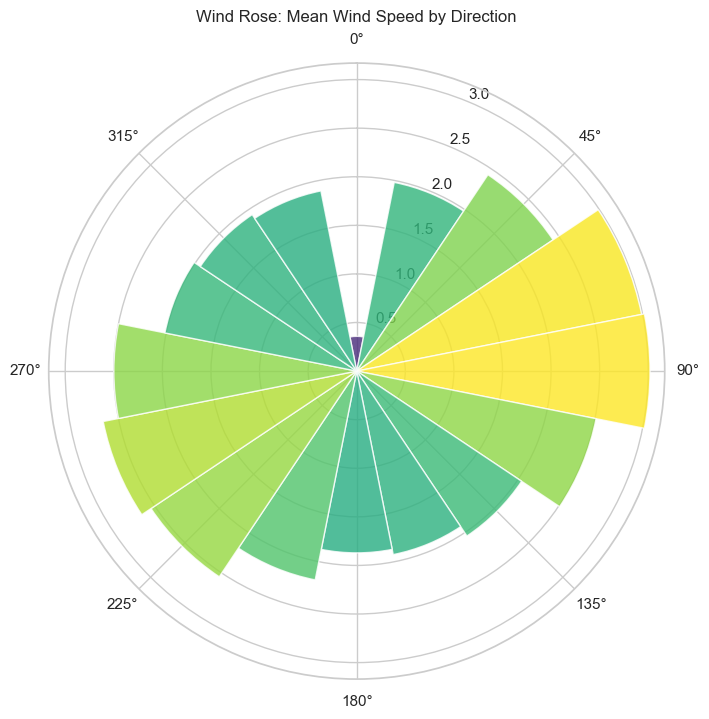

In [22]:
## Wind & Distribution Analysis
## Wind rose or radial bar plot of WS/WD

import numpy as np
import matplotlib.pyplot as plt

# Drop NaNs for safety
wind_data = df_clean[['WD', 'WS']].dropna()

# Convert degrees to radians for polar plotting
wind_dir_rad = np.deg2rad(wind_data['WD'])

# Define wind speed bins
speed_bins = [0, 2, 4, 6, 8, 10, 12, 20]
wind_data['WS_bin'] = pd.cut(wind_data['WS'], bins=speed_bins, labels=speed_bins[1:])

# Calculate frequency of each direction bin
num_bins = 16  # divide full circle into 16 sectors (22.5° each)
bins = np.linspace(0, 2 * np.pi, num_bins + 1)
wind_data['dir_bin'] = pd.cut(wind_dir_rad, bins=bins, labels=False, include_lowest=True)

# Average WS per direction bin
wind_mean = wind_data.groupby('dir_bin')['WS'].mean()
angles = np.linspace(0, 2 * np.pi, num_bins, endpoint=False)

# Plot wind rose
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, wind_mean, width=2*np.pi/num_bins, color=plt.cm.viridis(wind_mean / wind_mean.max()), alpha=0.8)

ax.set_theta_zero_location("N")  # 0° at north
ax.set_theta_direction(-1)       # clockwise
ax.set_title("Wind Rose: Mean Wind Speed by Direction", va='bottom')

plt.show()


## Histograms for GHI and one other variable (e.g., WS)

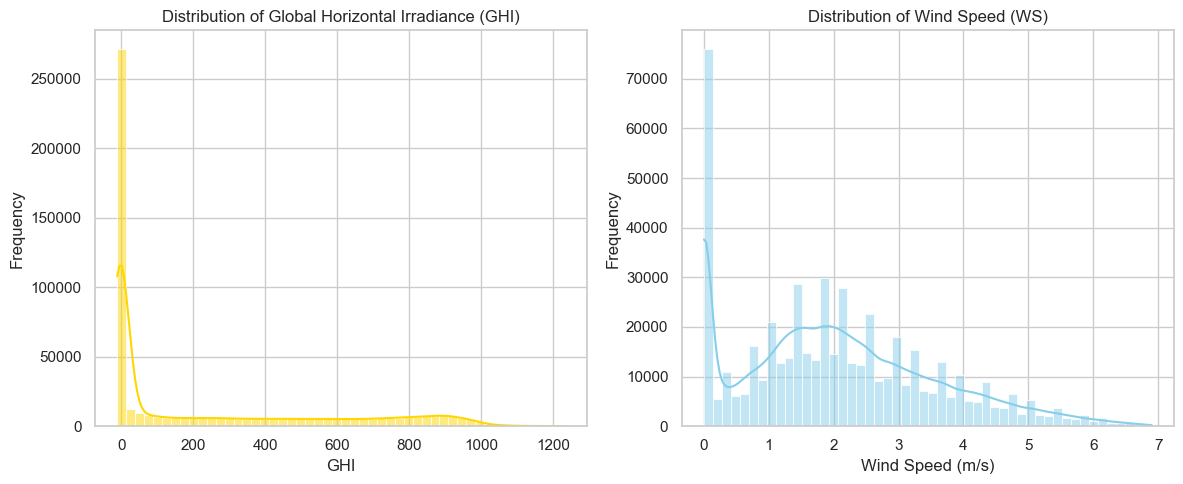

In [23]:
## Distribution Analysis
## Histograms for GHI and WS

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
plt.figure(figsize=(12, 5))

# GHI Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=50, kde=True, color='gold')
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# WS Histogram
plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Temperature Analysis

## Examine how relative humidity (RH) might influence temperature readings and solar radiation

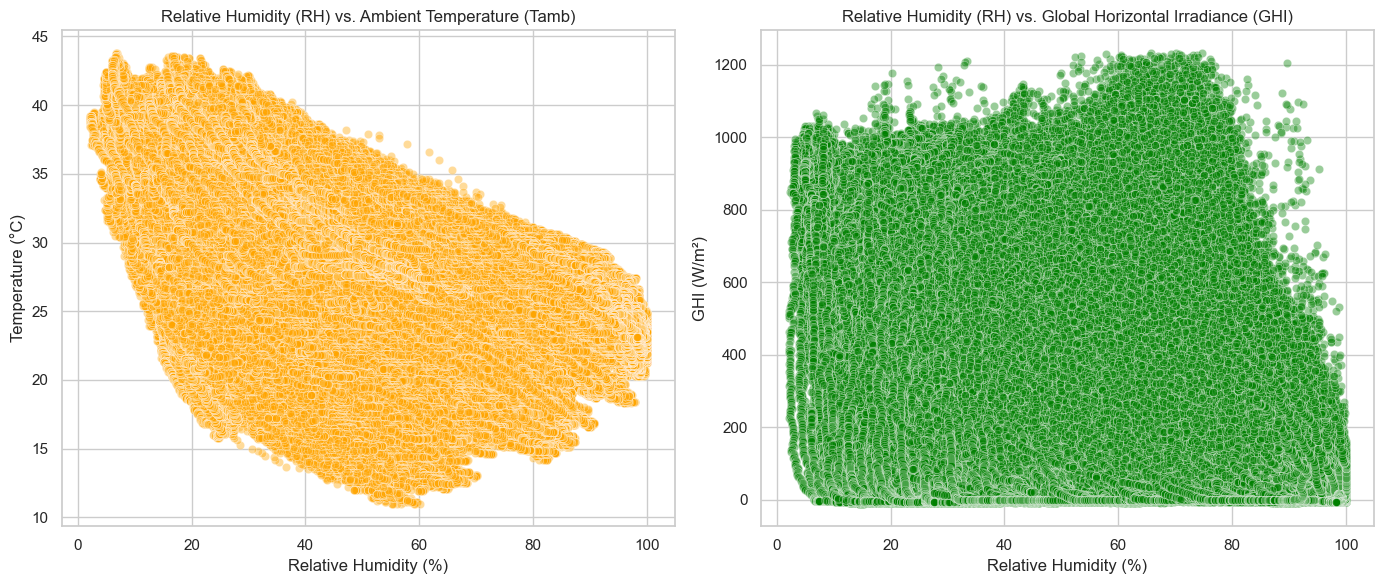

In [24]:
## Temperature Analysis
## Examine how relative humidity (RH) might influence temperature readings and solar radiation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Scatter plot: RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.4, color='orange')
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# Scatter plot: RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.4, color='green')
plt.title('Relative Humidity (RH) vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()


## Bubble Chart

## GHI vs. Tamb with bubble size = RH or BP

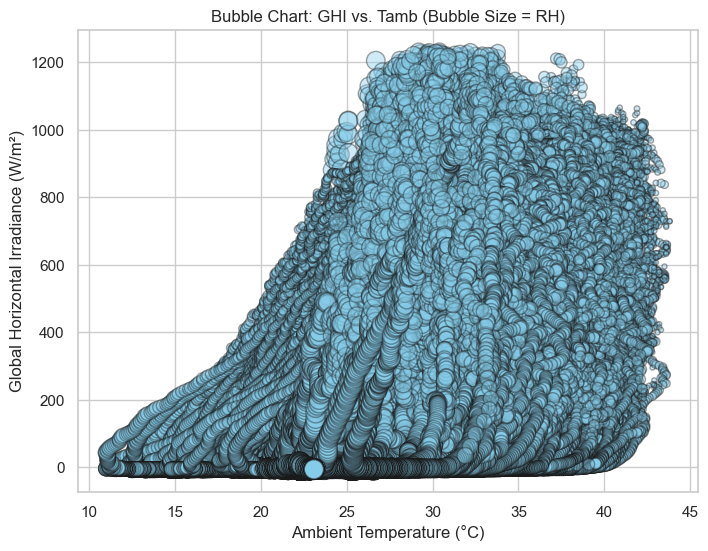

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Bubble chart: GHI vs Tamb, bubble size = RH
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH'] * 2,   # Scale bubble size for visibility
            alpha=0.4, c='skyblue', edgecolors='k')

plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.show()
